In [99]:
import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # For scaling
from sklearn.impute import SimpleImputer  # For handling missing values
from sklearn.preprocessing import OneHotEncoder, LabelEncoder  # For encoding categorical data
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [100]:
df = pd.read_csv("train_clean1.csv")

In [101]:
df.head()

,id,Jumlah Tanggungan dalam Keluarga,Pekerjaan Orang Tua/Wali,Pendidikan Orang Tua/Wali,Kepemilikan Aset,Lokasi Tempat Tinggal,Pengeluaran Bulanan Keluarga,Riwayat Beasiswa atau Bantuan Pendidikan,Ayah Hidup?,Ibu Hidup?,...,Bahan Tembok Rumah,Bahan Lantai Rumah,Rerata Pengeluaran Listrik & Air per Bulan,Total Hutang,Cicilan Hutang per Bulan,Program Studi,Kota,Jalur Masuk,Golongan UKT,Pendapatan Keluarga Encode
0,127748,2.0,5,21,2,199,500000.0,1,1,0,...,3040,1384,450000.000000,0.0,0.0,12,198,1,0.0,2.0
1,90205,2.0,0,21,2,465,3500000.0,3,0,0,...,512,240,320000.000000,45000000.0,4500000.0,7,464,0,3.0,6.0
2,82795,2.0,6,18,2,305,600000.0,2,0,0,...,593,240,425275.114326,0.0,0.0,12,304,1,4.0,4.0
3,108947,2.0,6,22,2,36,2250000.0,4,0,0,...,362,240,500000.000000,0.0,0.0,29,35,1,5.0,6.0
4,89985,1.0,6,8,2,412,2310000.0,4,0,0,...,711,510,105000.000000,5000000.0,500000.0,52,411,0,3.0,4.0


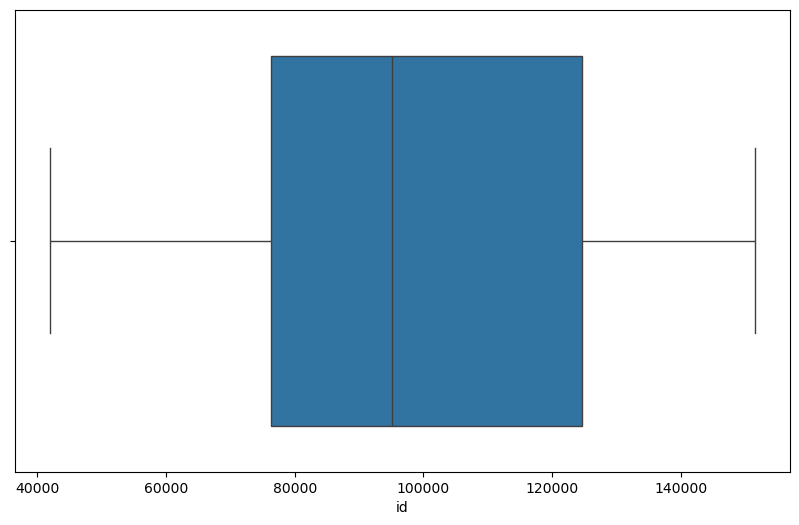

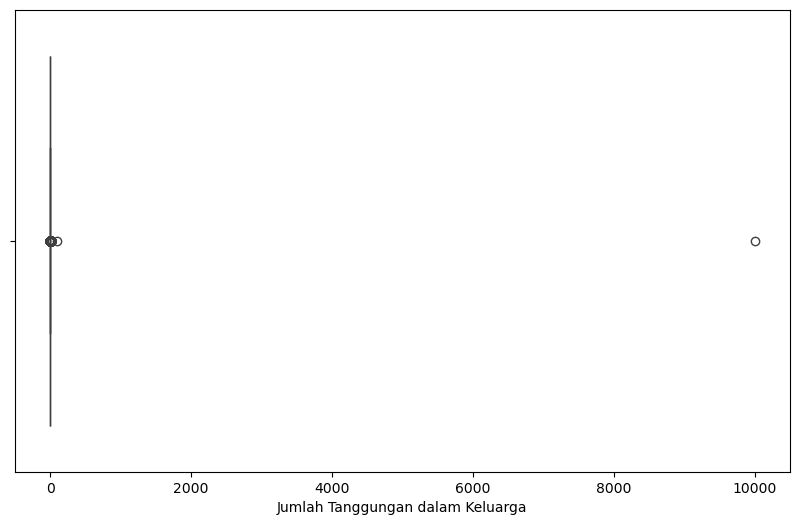

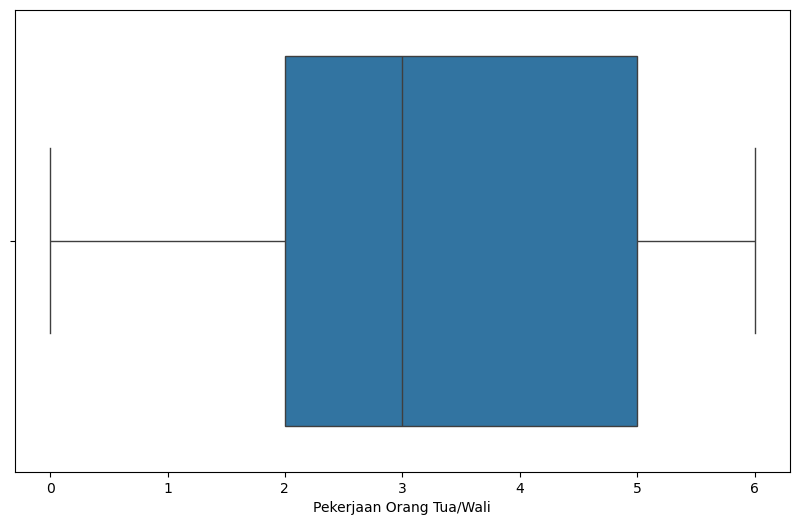

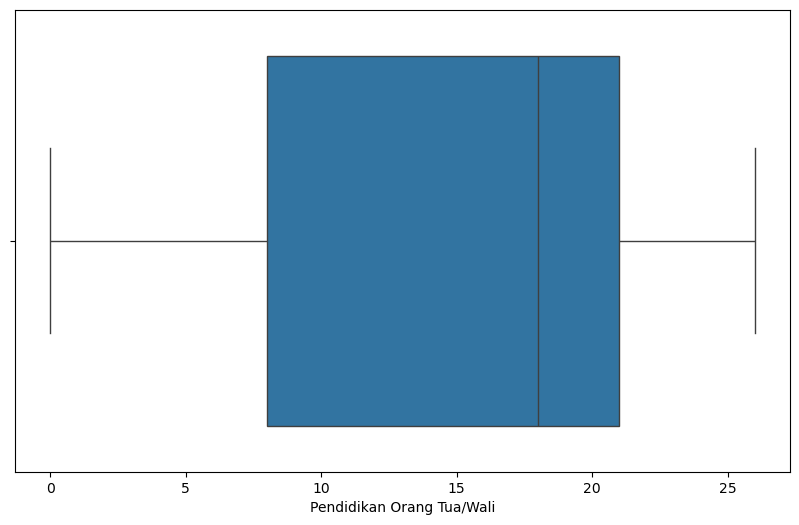

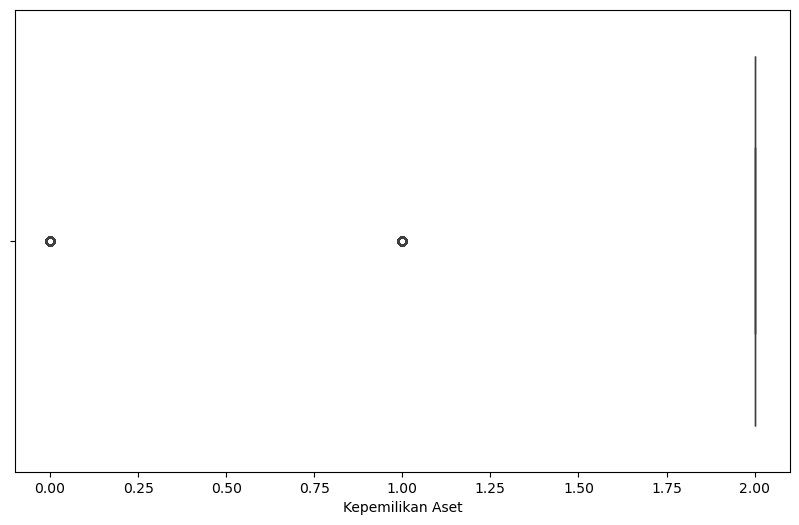

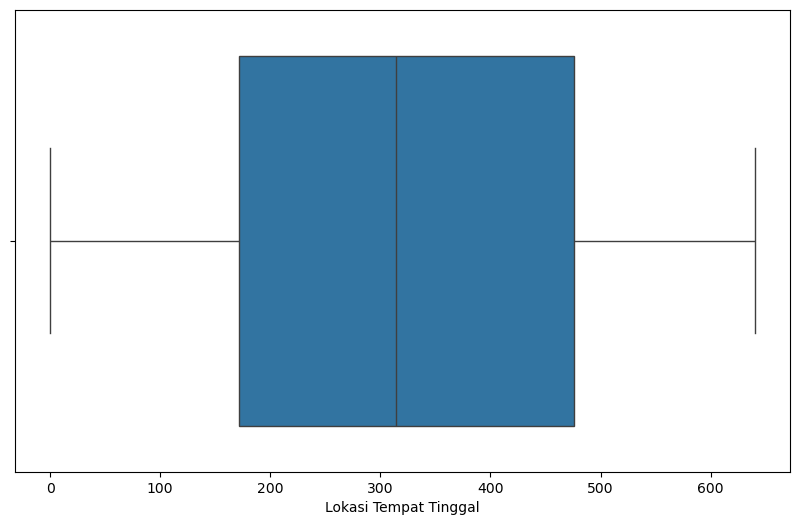

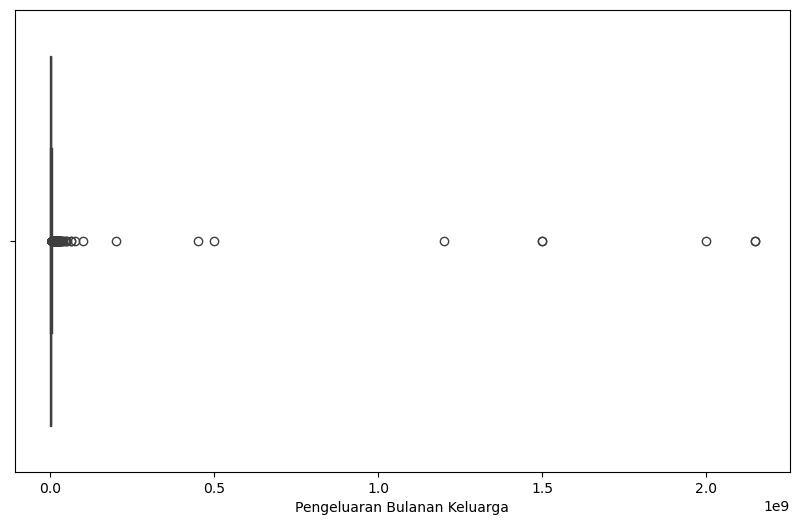

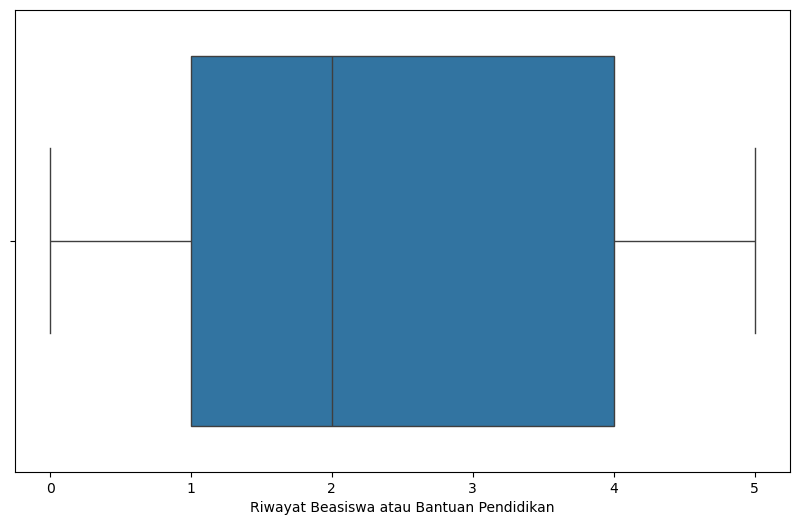

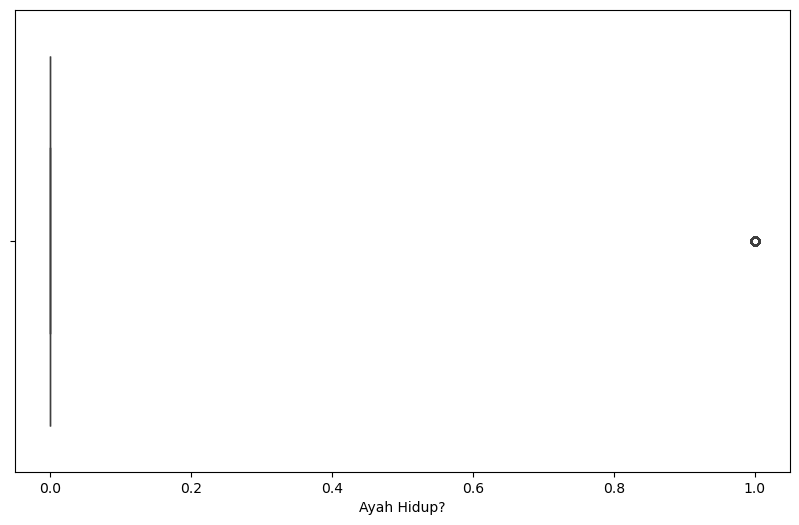

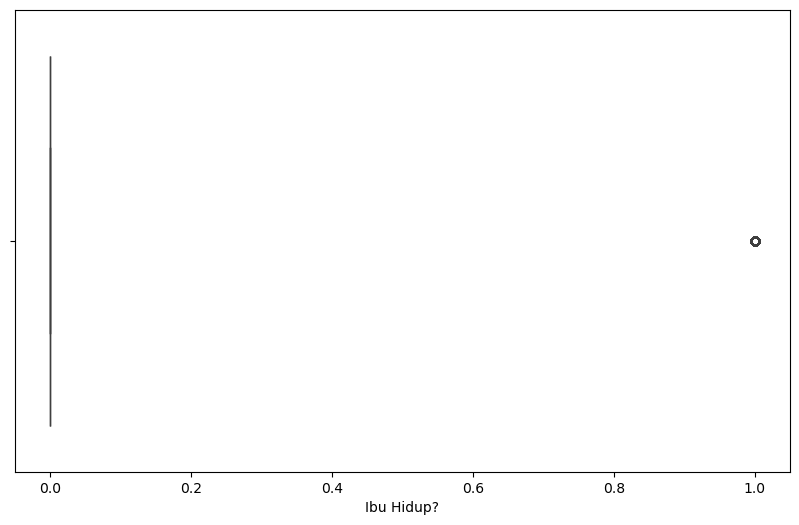

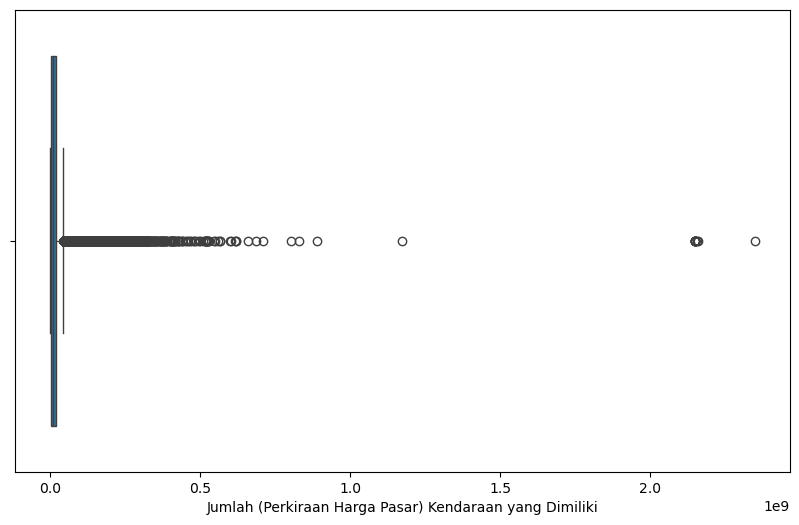

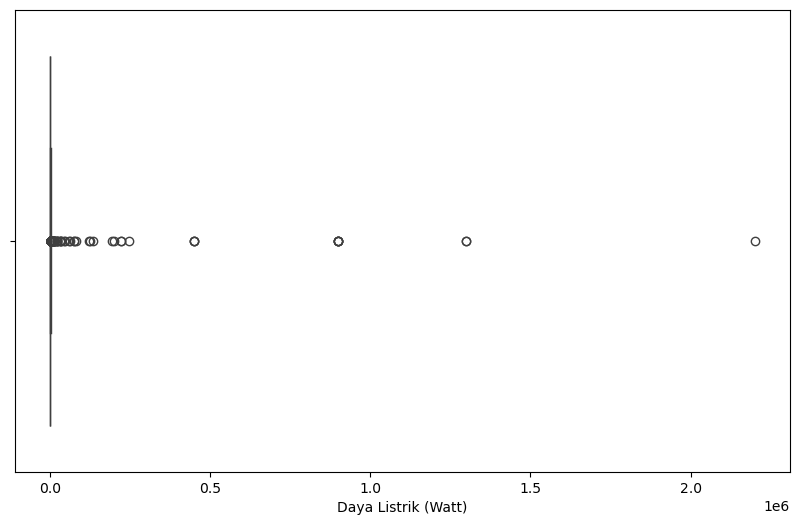

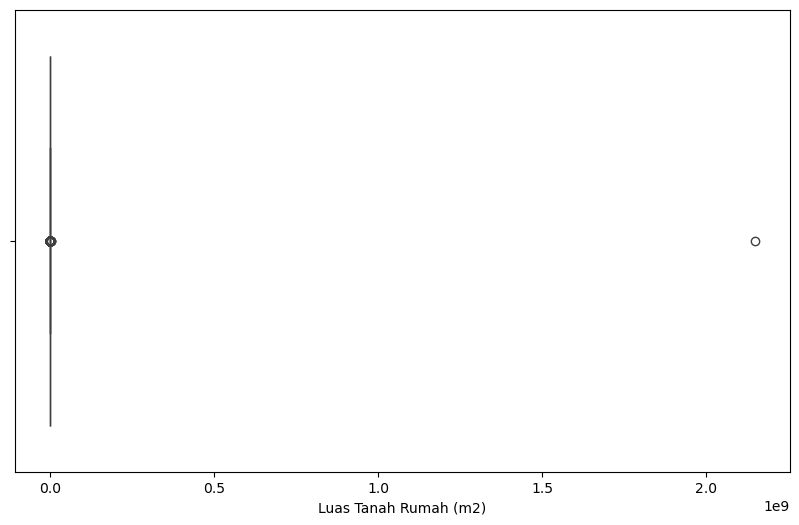

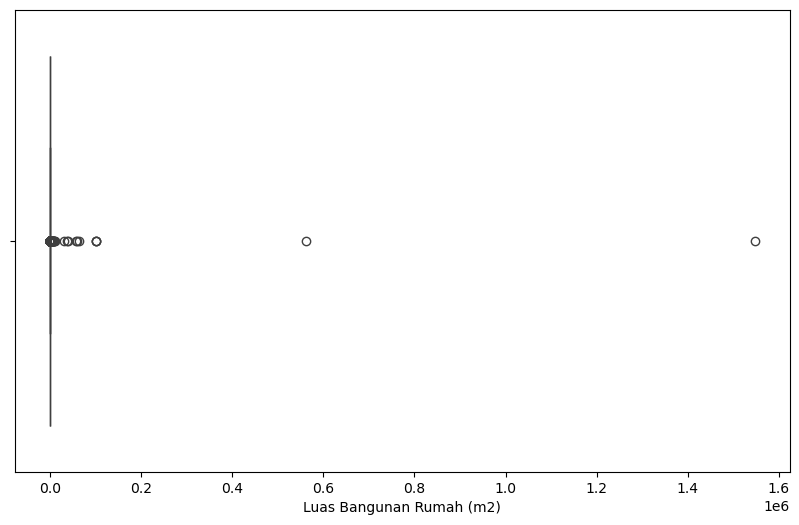

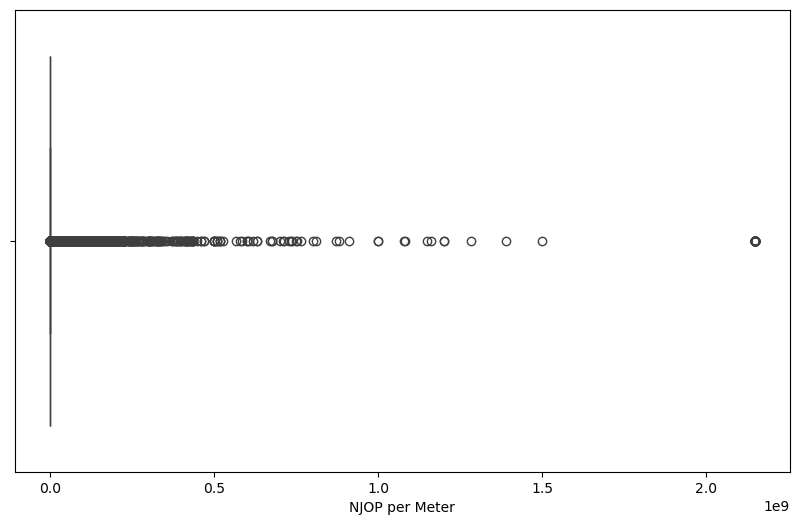

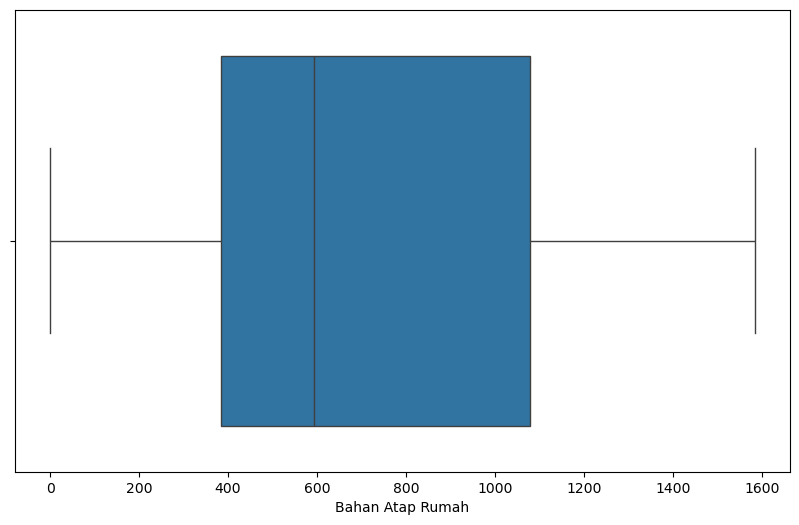

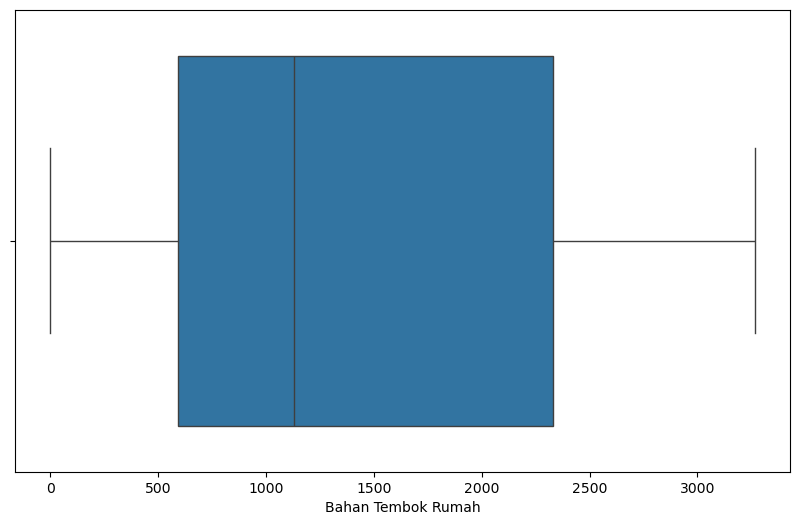

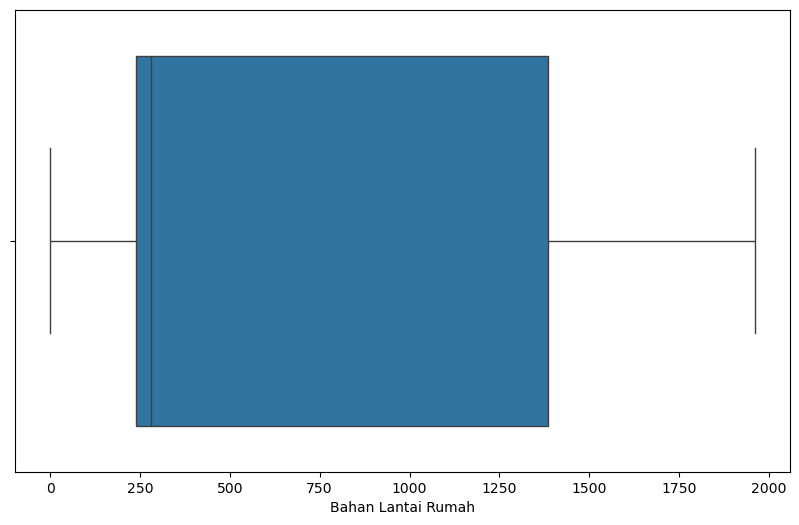

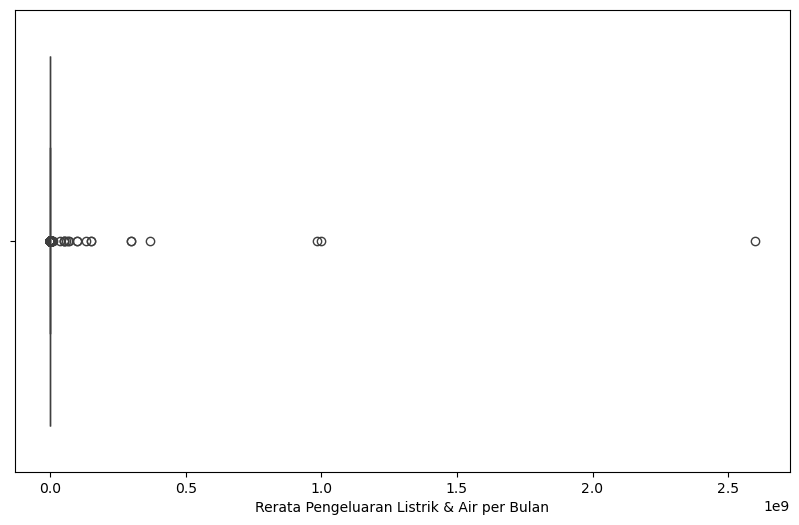

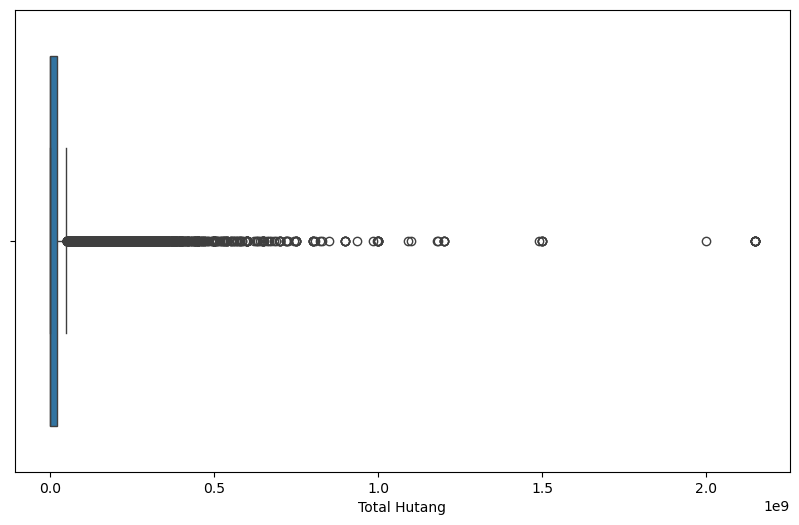

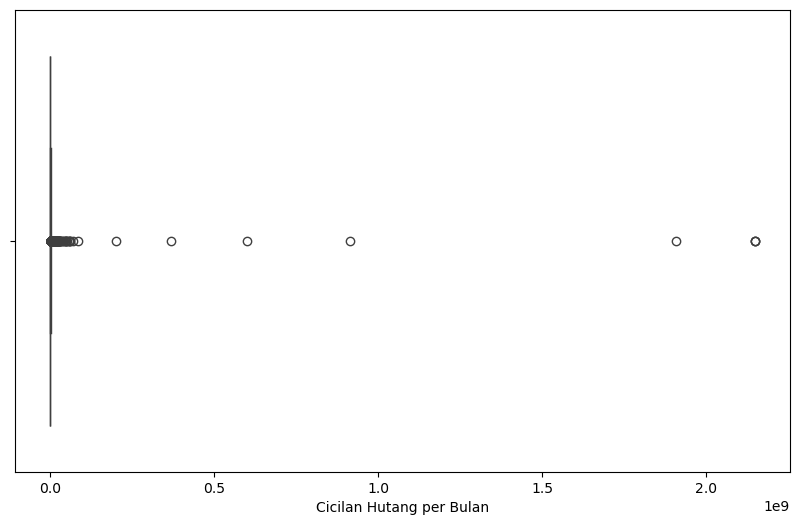

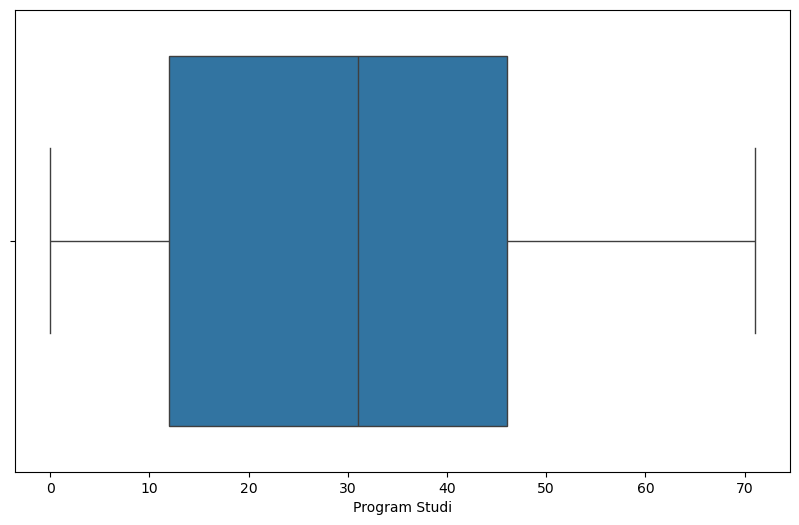

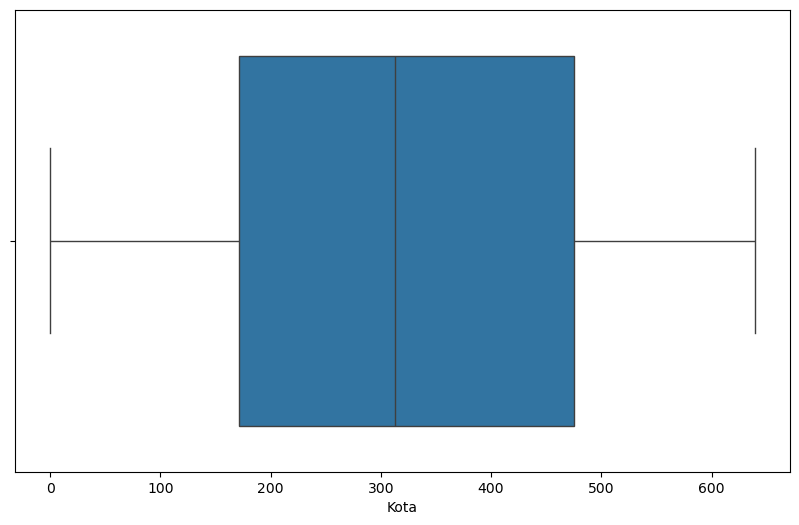

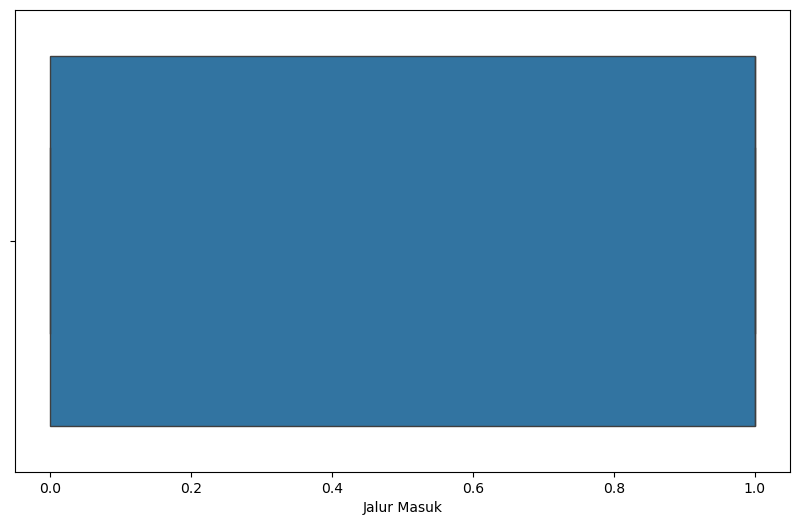

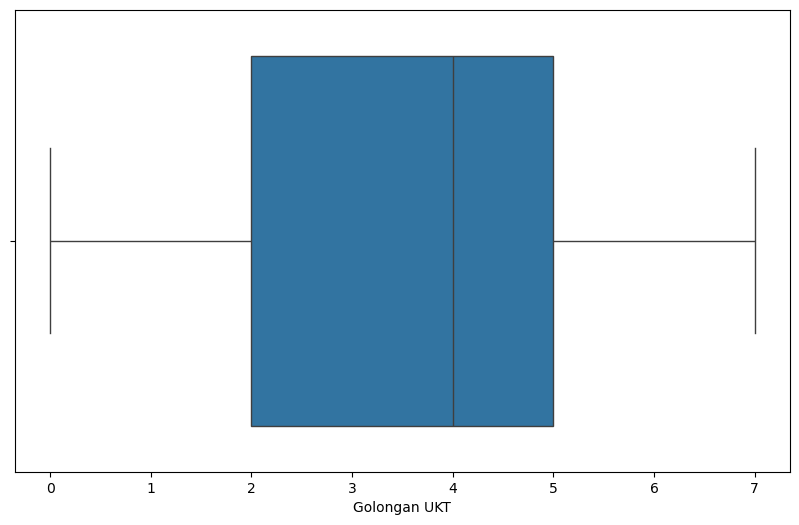

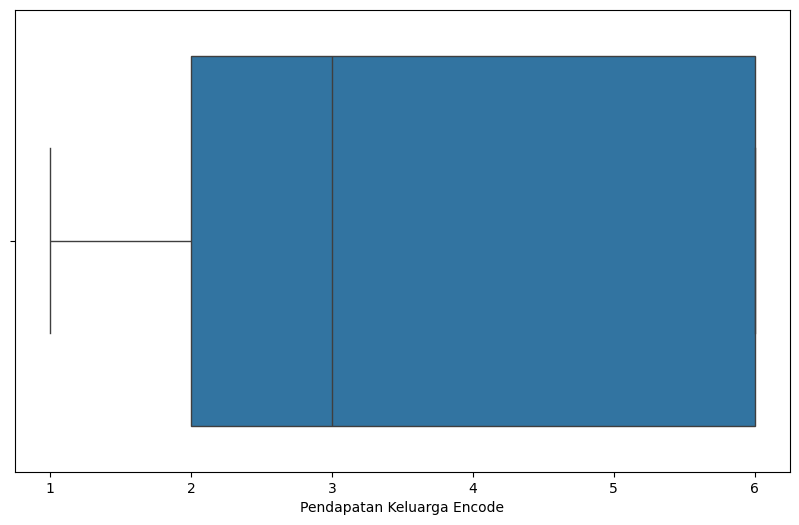

In [102]:
for kol in df_standar:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[kol])
    plt.xlabel(kol)
    plt.show()

In [103]:
print(df.skew())

id                                                          0.041762
Jumlah Tanggungan dalam Keluarga                          174.188550
Pekerjaan Orang Tua/Wali                                   -0.249068
Pendidikan Orang Tua/Wali                                  -0.395229
Kepemilikan Aset                                           -1.821478
Lokasi Tempat Tinggal                                       0.031163
Pengeluaran Bulanan Keluarga                               72.240005
Riwayat Beasiswa atau Bantuan Pendidikan                   -0.107663
Ayah Hidup?                                                 3.427916
Ibu Hidup?                                                  4.958141
Jumlah (Perkiraan Harga Pasar) Kendaraan yang Dimiliki     15.820189
Daya Listrik (Watt)                                        69.115045
Luas Tanah Rumah (m2)                                     174.297785
Luas Bangunan Rumah (m2)                                  148.040445
NJOP per Meter                    

In [104]:
df_normaliz = df.copy()

In [105]:
minmax_scaler = MinMaxScaler()
df_normaliz['Jumlah Tanggungan dalam Keluarga'] = minmax_scaler.fit_transform(df[['Jumlah Tanggungan dalam Keluarga']])
df_normaliz['Kepemilikan Aset'] = minmax_scaler.fit_transform(df[['Kepemilikan Aset']])
df_normaliz['Pengeluaran Bulanan Keluarga'] = minmax_scaler.fit_transform(df[['Pengeluaran Bulanan Keluarga']])
df_normaliz['Ayah Hidup?'] = minmax_scaler.fit_transform(df[['Ayah Hidup?']])
df_normaliz['Ibu Hidup?'] = minmax_scaler.fit_transform(df[['Ibu Hidup?']])
df_normaliz['Jumlah (Perkiraan Harga Pasar) Kendaraan yang Dimiliki'] = minmax_scaler.fit_transform(df[['Jumlah (Perkiraan Harga Pasar) Kendaraan yang Dimiliki']])
df_normaliz['Daya Listrik (Watt)'] = minmax_scaler.fit_transform(df[['Daya Listrik (Watt)']])
df_normaliz['Luas Tanah Rumah (m2)'] = minmax_scaler.fit_transform(df[['Luas Tanah Rumah (m2)']])
df_normaliz['Luas Bangunan Rumah (m2)'] = minmax_scaler.fit_transform(df[['Luas Bangunan Rumah (m2)']])
df_normaliz['NJOP per Meter'] = minmax_scaler.fit_transform(df[['NJOP per Meter']])
df_normaliz['Rerata Pengeluaran Listrik & Air per Bulan'] = minmax_scaler.fit_transform(df[['Rerata Pengeluaran Listrik & Air per Bulan']])
df_normaliz['Total Hutang'] = minmax_scaler.fit_transform(df[['Total Hutang']])
df_normaliz['Cicilan Hutang per Bulan'] = minmax_scaler.fit_transform(df[['Cicilan Hutang per Bulan']])

In [106]:
df_normaliz.skew()

id                                                          0.041762
Jumlah Tanggungan dalam Keluarga                          174.188550
Pekerjaan Orang Tua/Wali                                   -0.249068
Pendidikan Orang Tua/Wali                                  -0.395229
Kepemilikan Aset                                           -1.821478
Lokasi Tempat Tinggal                                       0.031163
Pengeluaran Bulanan Keluarga                               72.240005
Riwayat Beasiswa atau Bantuan Pendidikan                   -0.107663
Ayah Hidup?                                                 3.427916
Ibu Hidup?                                                  4.958141
Jumlah (Perkiraan Harga Pasar) Kendaraan yang Dimiliki     15.820189
Daya Listrik (Watt)                                        69.115045
Luas Tanah Rumah (m2)                                     174.297785
Luas Bangunan Rumah (m2)                                  148.040445
NJOP per Meter                    

In [137]:
df_standardz = df.copy()

In [139]:
scalers = StandardScaler()

df_standardz = pd.DataFrame(scalers.fit_transform(df), columns=df.columns)


In [141]:
df_standardz.skew()

id                                                          0.041762
Jumlah Tanggungan dalam Keluarga                          174.188550
Pekerjaan Orang Tua/Wali                                   -0.249068
Pendidikan Orang Tua/Wali                                  -0.395229
Kepemilikan Aset                                           -1.821478
Lokasi Tempat Tinggal                                       0.031163
Pengeluaran Bulanan Keluarga                               72.240005
Riwayat Beasiswa atau Bantuan Pendidikan                   -0.107663
Ayah Hidup?                                                 3.427916
Ibu Hidup?                                                  4.958141
Jumlah (Perkiraan Harga Pasar) Kendaraan yang Dimiliki     15.820189
Daya Listrik (Watt)                                        69.115045
Luas Tanah Rumah (m2)                                     174.297785
Luas Bangunan Rumah (m2)                                  148.040445
NJOP per Meter                    

In [110]:
df_standar = df.copy()

In [111]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer(norm='max')
df_standar['Jumlah Tanggungan dalam Keluarga'] = scaler.fit_transform(df[['Jumlah Tanggungan dalam Keluarga']])
df_standar['Kepemilikan Aset'] = scaler.fit_transform(df[['Kepemilikan Aset']])
df_standar['Pengeluaran Bulanan Keluarga'] = scaler.fit_transform(df[['Pengeluaran Bulanan Keluarga']])
df_standar['Ayah Hidup?'] = scaler.fit_transform(df[['Ayah Hidup?']])
df_standar['Ibu Hidup?'] = scaler.fit_transform(df[['Ibu Hidup?']])
df_standar['Jumlah (Perkiraan Harga Pasar) Kendaraan yang Dimiliki'] = scaler.fit_transform(df[['Jumlah (Perkiraan Harga Pasar) Kendaraan yang Dimiliki']])
df_standar['Daya Listrik (Watt)'] = scaler.fit_transform(df[['Daya Listrik (Watt)']])
df_standar['Luas Tanah Rumah (m2)'] = scaler.fit_transform(df[['Luas Tanah Rumah (m2)']])
df_standar['Luas Bangunan Rumah (m2)'] = scaler.fit_transform(df[['Luas Bangunan Rumah (m2)']])
df_standar['NJOP per Meter'] = scaler.fit_transform(df[['NJOP per Meter']])
df_standar['Rerata Pengeluaran Listrik & Air per Bulan'] = scaler.fit_transform(df[['Rerata Pengeluaran Listrik & Air per Bulan']])
df_standar['Total Hutang'] = scaler.fit_transform(df[['Total Hutang']])
df_standar['Cicilan Hutang per Bulan'] = scaler.fit_transform(df[['Cicilan Hutang per Bulan']])


In [112]:
df_standar.skew()

id                                                         0.041762
Jumlah Tanggungan dalam Keluarga                          -1.517673
Pekerjaan Orang Tua/Wali                                  -0.249068
Pendidikan Orang Tua/Wali                                 -0.395229
Kepemilikan Aset                                          -4.542386
Lokasi Tempat Tinggal                                      0.031163
Pengeluaran Bulanan Keluarga                             -12.840077
Riwayat Beasiswa atau Bantuan Pendidikan                  -0.107663
Ayah Hidup?                                                3.427916
Ibu Hidup?                                                 4.958141
Jumlah (Perkiraan Harga Pasar) Kendaraan yang Dimiliki    -3.573450
Daya Listrik (Watt)                                      -10.253468
Luas Tanah Rumah (m2)                                    -10.000137
Luas Bangunan Rumah (m2)                                  -5.475798
NJOP per Meter                                  

In [113]:
df_manual = df.copy()

In [114]:
import numpy as np

def custom_scaling(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

df_standar['Jumlah Tanggungan dalam Keluarga'] = scaler.fit_transform(df[['Jumlah Tanggungan dalam Keluarga']])
df_standar['Kepemilikan Aset'] = scaler.fit_transform(df[['Kepemilikan Aset']])
df_standar['Pengeluaran Bulanan Keluarga'] = scaler.fit_transform(df[['Pengeluaran Bulanan Keluarga']])
df_standar['Ayah Hidup?'] = scaler.fit_transform(df[['Ayah Hidup?']])
df_standar['Ibu Hidup?'] = scaler.fit_transform(df[['Ibu Hidup?']])
df_standar['Jumlah (Perkiraan Harga Pasar) Kendaraan yang Dimiliki'] = scaler.fit_transform(df[['Jumlah (Perkiraan Harga Pasar) Kendaraan yang Dimiliki']])
df_standar['Daya Listrik (Watt)'] = scaler.fit_transform(df[['Daya Listrik (Watt)']])
df_standar['Luas Tanah Rumah (m2)'] = scaler.fit_transform(df[['Luas Tanah Rumah (m2)']])
df_standar['Luas Bangunan Rumah (m2)'] = scaler.fit_transform(df[['Luas Bangunan Rumah (m2)']])
df_standar['NJOP per Meter'] = scaler.fit_transform(df[['NJOP per Meter']])
df_standar['Rerata Pengeluaran Listrik & Air per Bulan'] = scaler.fit_transform(df[['Rerata Pengeluaran Listrik & Air per Bulan']])
df_standar['Total Hutang'] = scaler.fit_transform(df[['Total Hutang']])
df_standar['Cicilan Hutang per Bulan'] = scaler.fit_transform(df[['Cicilan Hutang per Bulan']])

In [115]:
df_standar.to_csv("outliers_zidan.csv", index=None)